In [1]:
import torch
import pandas as pd
from pathlib import Path

from src.prompt_manager import PromptManager
from src.data_manager import DataManager

from src import data_processing
import yaml
from src import paths
import hashlib

In [2]:
from src.utils import interactive_dataframe_selector

To-do list

- Check whether disagreement between humans and models is related to input length!!!!!!!!
    - Yes, but not in the expected way. Humans exhibit slight verbosity bias (0.45 corr between token count and rating). The correlation between human-llm disagreement and token count is negative. 

New to-do
- Modified entire pipeline: 
    - Need to check whether all the outputs are correct
    - Why does it create 8 shards when there are 50 datapoints and 10 rows per shard?

# McGill QA Analysis

# Data loading

Beware that the mean_rating and mode_rating column now default to 5-scale, while the human evaluations are on 4-scale. 

In [3]:
with open('../src/configs/config.yaml', 'r') as f:
    full_config = yaml.safe_load(f)

# active_analysis = full_config['active_analysis']
active_analysis = 'mcgill_qa_feedback'
model_vars = full_config['analyses'][active_analysis]['model_vars']
experimental_groups = model_vars['experimental_groups']

In [4]:
raw_df = pd.read_parquet(paths.RAW_DATA_DIR / f'{active_analysis}.parquet')
raw_df

,Unnamed: 0,question,passage,feedback,rating,domain,review_1,explanation_1,review_2,explanation_2,score_1,score_2,answer,input_id
0,0,How do I get help finding a job?,"{'passage_id': 140, 'reference': {'page_title'...",['Has a link to detailed information about gov...,"['Excellent', 'Could be Improved']",Australia,Excellent,Has a link to detailed information about gover...,Could be Improved,"This answer provides a link for job searches, ...",4,2,If you are a current job seeker or participant...,eff9e000675931f5
1,1,How do I get help finding a job?,"{'passage_id': 139, 'reference': {'page_title'...","['A link to a job search website is included, ...","['Excellent', 'Excellent']",Australia,Excellent,"A link to a job search website is included, as...",Excellent,"Includes a link to a Jobs Hub page, which is b...",4,4,In this rapidly changing jobs market the Austr...,c8be913323f10444
2,2,How do I get help finding a job?,"{'passage_id': 126, 'reference': {'page_title'...",['Talks about tax credits for businesses that ...,"['Bad', 'Acceptable']",Australia,Bad,Talks about tax credits for businesses that hi...,Acceptable,"This answer discusses the Employment Fund, whi...",1,3,To further assist job seekers to prepare for a...,31effc925bc04105
3,3,If I am in Australia on a worker holiday marke...,"{'passage_id': 581, 'reference': {'page_title'...","[""Answer is about Working Holiday Makers, but ...","['Could be Improved', 'Acceptable']",Australia,Could be Improved,"Answer is about Working Holiday Makers, but do...",Acceptable,Answer is rather cut and dry but is also a lit...,2,3,No. Existing arrangements for specified work w...,610d0764ed04054d
4,4,If I am in Australia on a worker holiday marke...,"{'passage_id': 577, 'reference': {'page_title'...","[""Discusses pandemic visas. Doesn't mention th...","['Bad', 'Could be Improved']",Australia,Bad,Discusses pandemic visas. Doesn't mention the ...,Could be Improved,This answer is very vague and does not answer ...,1,2,The COVID-19 Pandemic event visa can only be g...,033e9fcef5d75297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,5655,Can you explain to me what self-care is,"{'passage_id': 159, 'reference': {'page_title'...",['This answer explains what self care is direc...,"['Excellent', 'Excellent']",WHO,Excellent,This answer explains what self care is directly.,Excellent,This is a direct answer to the question. This ...,4,4,WHO’s definition of self care is the ability o...,87acd0f1a053ee69
5656,5656,Can you explain to me what self-care is,"{'passage_id': 158, 'reference': {'page_title'...","[""This answer talks about what self care is an...","['Excellent', 'Bad']",WHO,Excellent,This answer talks about what self care is and ...,Bad,This does not answer the question. This answer...,4,1,With the major disruptions to the normal funct...,77641257547b9e1a
5657,5657,Is it safe for me to manually replace my IUD a...,"{'passage_id': 70, 'reference': {'page_title':...",['Does not address whether or not replacing an...,"['Bad', 'Bad']",WHO,Bad,Does not address whether or not replacing an I...,Bad,The answer is irrelevant to the question. This...,1,1,"If you do not want to become pregnant, you sho...",16b4ea5c8b2b6721
5658,5658,Is it safe for me to manually replace my IUD a...,"{'passage_id': 103, 'reference': {'page_title'...",['Does not answer whether or not IUD can be sa...,"['Bad', 'Bad']",WHO,Bad,Does not answer whether or not IUD can be safe...,Bad,This answer is irrelevant to the question. Thi...,1,1,No. Disposable medical face masks are intended...,f2610cfa76f5bbde


In [5]:
from src.data_manager import DataManager
from pathlib import Path

In [6]:
final_df = data_processing.get_analysis_ready_df(full_config=full_config,
                                                 active_analysis='mcgill_qa_feedback',
                                                 use_cache=False,
                                                 force_refresh=False)

Loading files for analysis mcgill_qa_feedback
🐢 Running full processing pipeline...
Finished loading experiment data
Found 0 experimental trials contaminated by garbage output.


C:\Users\Wouter Barter\Documents\AI_thesis\src\data_processing.py:274: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights_tensor = torch.tensor(weights, dtype=torch.float32)


In [7]:
final_df

,Unnamed: 0,question,passage,feedback,rating,domain,review_1,explanation_1,review_2,explanation_2,...,constrained_token_ids,sequences,top_k_logits,constrained_logits,top_k_tokens,constrained_tokens,sorted_tokens,sorted_logits,mean_rating,mode_rating
0,0,How do I get help finding a job?,"{'passage_id': 140, 'reference': {'page_title'...",['Has a link to detailed information about gov...,"['Excellent', 'Could be Improved']",Australia,Excellent,Has a link to detailed information about gover...,Could be Improved,"This answer provides a link for job searches, ...",...,"[236770, 236778, 236800, 236812]","[2, 2, 105, 2364, 107, 3048, 659, 614, 7710, 2...","[[49.13819122314453, 48.86311340332031, 42.016...","[[33.22682189941406, 49.13819122314453, 48.863...","[[2, 3, \n\n, 4, \n, 5, 1, 6, **, <0xC2>, 7, \...","[1, 2, 3, 4]","[1, 2, 3, 4]","[[33.22682189941406, 49.13819122314453, 48.863...",2.431805,2.0
1,0,How do I get help finding a job?,"{'passage_id': 140, 'reference': {'page_title'...",['Has a link to detailed information about gov...,"['Excellent', 'Could be Improved']",Australia,Excellent,Has a link to detailed information about gover...,Could be Improved,"This answer provides a link for job searches, ...",...,"[236770, 236778, 236800, 236812]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[44.97024154663086, 37.50925064086914, 34.651...","[[32.41510009765625, 44.97024154663086, 37.509...","[[2, 3, \n\n, 1, 4, \n, **, 6, 5, <0xC2>, ▁**,...","[1, 2, 3, 4]","[1, 2, 3, 4]","[[32.41510009765625, 44.97024154663086, 37.509...",2.000572,2.0
2,0,How do I get help finding a job?,"{'passage_id': 140, 'reference': {'page_title'...",['Has a link to detailed information about gov...,"['Excellent', 'Could be Improved']",Australia,Excellent,Has a link to detailed information about gover...,Could be Improved,"This answer provides a link for job searches, ...",...,"[236770, 236778, 236800, 236812]","[2, 2, 105, 2364, 107, 74279, 236787, 25870, 5...","[[47.204429626464844, 39.21881103515625, 39.10...","[[36.28003692626953, 47.204429626464844, 39.21...","[[2, 3, \n\n, 1, 4, \n, 5, 6, **, ▁**, 7, 0, <...","[1, 2, 3, 4]","[1, 2, 3, 4]","[[36.28003692626953, 47.204429626464844, 39.21...",2.000323,2.0
3,0,How do I get help finding a job?,"{'passage_id': 140, 'reference': {'page_title'...",['Has a link to detailed information about gov...,"['Excellent', 'Could be Improved']",Australia,Excellent,Has a link to detailed information about gover...,Could be Improved,"This answer provides a link for job searches, ...",...,"[236770, 236778, 236800, 236812]","[2, 2, 105, 2364, 107, 236820, 22768, 236813, ...","[[41.1337890625, 34.135284423828125, 31.810007...","[[31.810007095336914, 41.1337890625, 34.135284...","[[2, 3, 1, 4, 6, 5, \n\n, 7, 0, 8, \n, 9, ####...","[1, 2, 3, 4]","[1, 2, 3, 4]","[[31.810007095336914, 41.1337890625, 34.135284...",2.000827,2.0
4,0,How do I get help finding a job?,"{'passage_id': 140, 'reference': {'page_title'...",['Has a link to detailed information about gov...,"['Excellent', 'Could be Improved']",Australia,Excellent,Has a link to detailed information about gover...,Could be Improved,"This answer provides a link for job searches, ...",...,"[236770, 236778, 236800, 236812]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[40.88460922241211, 32.44206619262695, 32.381...","[[32.3818359375, 40.88460922241211, 32.4420661...","[[2, 3, 1, 4, 6, 5, **, \n\n, 7, \n, 0, 8, <0x...","[1, 2, 3, 4]","[1, 2, 3, 4]","[[32.3818359375, 40.88460922241211, 32.4420661...",2.000013,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,1399,Can COVID-19 spread through feces?,"{'passage_id': 186, 'reference': {'page_title'...","[""Says that COVID19 RNA has been found in stoo...","['Excellent', 'Could be Improved']",CDC,Excellent,Says that COVID19 RNA has been found in stool ...,Could be Improved,This response does mention that Covid has been...,...,"[16, 17, 18, 19]","[151643, 151643, 151643, 151

In [8]:
pm = PromptManager(folder=Path("../prompts/PromptSuites/MCGILL_QA_FEEDBACK"))
pm.load_all()

PromptManager initialized with folder: ..\prompts\PromptSuites\MCGILL_QA_FEEDBACK
Scanning 5 suites from ..\prompts\PromptSuites\MCGILL_QA_FEEDBACK...
Loaded 5 PromptSuites


{'080be5c39ffc': PromptSuite(id='080be5c39ffc', templates={'relevance': PromptTemplate(id='77fa4b453b', name='Relevance', dimension_name='relevance', description='Relevance BARS style prompt', token_constraints=['1', '2', '3', '4'], tags=['BARS', 'relevance', 'scale_4'], system_message='You are an expert evaluator. Your task is to rate the Relevance of the Question provided for the Answer on a scale of 1 to 4.\n\n*Relevance: Does the answer discuss the specific topic and entities requested?*\n1 = **Irrelevant**: Discusses a completely different topic (e.g., "baby delivery" instead of "respirators").\n2 = **Topic Mismatch**: Discusses a related category but the wrong specific entity (e.g., "Work Visa" instead of "Pandemic Visa").\n3 = **Broadly Relevant**: Discusses the correct topic but includes significant tangential or unrelated information.\n4 = **Precise**: Focuses exclusively on the specific entity and topic requested in the question.', user_message_template='Question:\n{question}

# Features


## Raw df

- mean score

In [9]:
raw_df['mean_human_rating'] = (raw_df['score_1'] + raw_df['score_2']) / 2

- estimated token count

In [10]:
raw_df['token_count'] = (raw_df['question'] + " " +
                         raw_df['answer']).str.split().str.len()

- disagreement

In [11]:
raw_df['human_disagreement'] = abs(raw_df['score_1'] - raw_df['score_2'])
# raw_df['question_hash'] = pd.util.hash_pandas_object(raw_df['question'])
# raw_df['answer_hash'] = pd.util.hash_pandas_object(raw_df['answer'])

relevant_columns = ['question', 'answer', 'rating',
                    'explanation_1', 'explanation_2', 'human_disagreement']
clean_df = raw_df.loc[:, relevant_columns]
clean_df

,question,answer,rating,explanation_1,explanation_2,human_disagreement
0,How do I get help finding a job?,If you are a current job seeker or participant...,"['Excellent', 'Could be Improved']",Has a link to detailed information about gover...,"This answer provides a link for job searches, ...",2
1,How do I get help finding a job?,In this rapidly changing jobs market the Austr...,"['Excellent', 'Excellent']","A link to a job search website is included, as...","Includes a link to a Jobs Hub page, which is b...",0
2,How do I get help finding a job?,To further assist job seekers to prepare for a...,"['Bad', 'Acceptable']",Talks about tax credits for businesses that hi...,"This answer discusses the Employment Fund, whi...",2
3,If I am in Australia on a worker holiday marke...,No. Existing arrangements for specified work w...,"['Could be Improved', 'Acceptable']","Answer is about Working Holiday Makers, but do...",Answer is rather cut and dry but is also a lit...,1
4,If I am in Australia on a worker holiday marke...,The COVID-19 Pandemic event visa can only be g...,"['Bad', 'Could be Improved']",Discusses pandemic visas. Doesn't mention the ...,This answer is very vague and does not answer ...,1
...,...,...,...,...,...,...
5655,Can you explain to me what self-care is,WHO’s definition of self care is the ability o...,"['Excellent', 'Excellent']",This answer explains what self care is directly.,This is a direct answer to the question. This ...,0
5656,Can you explain to me what self-care is,With the major disruptions to the normal funct...,"['Excellent', 'Bad']",This answer talks about what self care is and ...,This does not answer the question. This answer...,3
5657,Is it safe for me to manually replace my IUD a...,"If you do not want to become pregnant, you sho...","['Bad', 'Bad']",Does not address whether or not replacing an I...,The answer is irrelevant to the question. This...,0
5658,Is it safe for me to manually replace my IUD a...,No. Disposable medical face masks are intended...,"['Bad', 'Bad']",Does not answer whether or not IUD can be safe...,This answer is irrelevant to the question. Thi...,0


## Results df

- decode prompt IDs

In [164]:
# 1. Define the Mapping Dictionary
prompt_hash_map = {
    "080be5c39ffc": "formative BARS no XML",
    "2f16b595bed1": "formative BARS XML",
    "4a3297c956":   "holistic BARS XML",
    "5067939a72":   "holistic BARS no XML",
    "83458ec049":   "holistic baseline (naive)"
}

# 2. Map the Description to the Dataframe
# (Assuming the column containing the hash is named 'prompt_id' - change if different)
final_df['prompt_description'] = final_df['prompt_id'].map(prompt_hash_map)

# 3. Create Specific Feature Columns for Analysis

# Extract XML Usage (True/False)
# Logic: It is True only if "XML" is present and "no XML" is NOT present
final_df['is_xml'] = final_df['prompt_description'].apply(
    lambda x: True if "XML" in str(x) and "no XML" not in str(x) else False
)

# Extract Prompt Type (Holistic vs Formative)
final_df['prompt_type'] = final_df['prompt_description'].apply(
    lambda x: "formative" if "formative" in str(x) else ("holistic" if "holistic" in str(x) else "unknown")
)

# Extract Method (BARS vs Baseline)
final_df['method'] = final_df['prompt_description'].apply(
    lambda x: "baseline" if "baseline" in str(x) else "BARS"
)

- mean human rating

In [12]:
final_df['mean_human_rating'] = (final_df['score_1'] + final_df['score_2']) / 2

- Logits to probabilities

In [13]:
softmax_logits = torch.softmax(torch.tensor(
    final_df['sorted_logits'].tolist()), dim=-1)

- Entropy

In [14]:
import numpy as np
from src.analysis.metrics import compute_entropy, calculate_reliability_gap, compute_validity_mass

final_df['entropy'] = compute_entropy(softmax_logits)
# TODO make n=4 dependent on len of constrained tokens
final_df['normalized_entropy'] = final_df['entropy'] / np.log(4)

- Difference in ratings

In [15]:
final_df['human_disagreement'] = abs(final_df.score_1 - final_df.score_2)
final_df['llm_disagreement_1'] = abs(final_df.score_1 - final_df.mode_rating)
final_df['llm_disagreement_2'] = abs(final_df.score_2 - final_df.mode_rating)
final_df['llm_disagreement_avg'] = (
    final_df['llm_disagreement_1'] + final_df['llm_disagreement_2'])/2

- difference between mean and mode rating

In [16]:
final_df['diff_mean_mode'] = abs(final_df['mean_rating'] - final_df['mode_rating'])

- Token counts

In [17]:
final_df['token_count'] = (final_df['question'] +
                           " " + final_df['answer']).str.split().str.len()

In [18]:
clean_final_df = final_df.loc[:, relevant_columns +
                              ['llm_disagreement_avg', 'model_name', 'mode_rating']]
clean_final_df

,question,answer,rating,explanation_1,explanation_2,human_disagreement,llm_disagreement_avg,model_name,mode_rating
0,How do I get help finding a job?,If you are a current job seeker or participant...,"['Excellent', 'Could be Improved']",Has a link to detailed information about gover...,"This answer provides a link for job searches, ...",2,1.0,google/gemma-3-4b-it,2.0
1,How do I get help finding a job?,If you are a current job seeker or participant...,"['Excellent', 'Could be Improved']",Has a link to detailed information about gover...,"This answer provides a link for job searches, ...",2,1.0,google/gemma-3-4b-it,2.0
2,How do I get help finding a job?,If you are a current job seeker or participant...,"['Excellent', 'Could be Improved']",Has a link to detailed information about gover...,"This answer provides a link for job searches, ...",2,1.0,google/gemma-3-4b-it,2.0
3,How do I get help finding a job?,If you are a current job seeker or participant...,"['Excellent', 'Could be Improved']",Has a link to detailed information about gover...,"This answer provides a link for job searches, ...",2,1.0,google/gemma-3-4b-it,2.0
4,How do I get help finding a job?,If you are a current job seeker or participant...,"['Excellent', 'Could be Improved']",Has a link to detailed information about gover...,"This answer provides a link for job searches, ...",2,1.0,google/gemma-3-4b-it,2.0
...,...,...,...,...,...,...,...,...,...
25195,Can COVID-19 spread through feces?,SARS-CoV-2 RNA has been detected in upper and ...,"['Excellent', 'Could be Improved']",Says that COVID19 RNA has been found in stool ...,This response does mention that Covid has been...,2,1.0,Qwen/Qwen3-4B-Instruct-2507,4.0
25196,Can COVID-19 spread through feces?,SARS-CoV-2 RNA has been detected in upper and ...,"['Excellent', 'Could be Improved']",Says that COVID19 RNA has been found in stool ...,This response does mention that Covid has been...,2,1.0,Qwen/Qwen3-4B-Instruct-2507,4.0
25197,Can COVID-19 spread through feces?,SARS-CoV-2 RNA has been detected in upper and ...,"['Excellent', 'Could be Improved']",Says that COVID19 RNA has been found in stool ...,This response does mention that Covid has been...,2,1.0,Qwen/Qwen3-4B-Instruct-2507,4.0
25198,Can COVID-19 spread through feces?,SARS-CoV-2 RNA has been detected in upper and ...,"['Excellent', 'Could be Improved']",Says that COVID19 RNA has been found in stool ...,This response does mention that Covid has been...,2,1.0,Qwen/Qwen3-4B-Instruct-2507,4.0


-----

# EDA: LLM Evals

## Entropy



Considerations
- Reliability ≠ validity. Low entropy models could be confidently wrong. 
- What explains entropy? Is it stable across inputs? Do different models exhibit the same entropy pattern? 
- Is it related to disagreement?

In [19]:
final_df.groupby(experimental_groups)['normalized_entropy'].mean().reset_index()

,model_name,prompt_id,dimension_name,normalized_entropy
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,0.250547
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,0.307748
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,0.199156
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,0.143421
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,0.171432
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,0.086399
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,0.163287
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,0.280381
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,0.194528
9,google/gemma-3-4b-it,080be5c39ffc,completeness,0.072673


In [20]:
final_df.groupby(experimental_groups)['normalized_entropy'].median().reset_index()

,model_name,prompt_id,dimension_name,normalized_entropy
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,0.231616
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,0.306141
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,0.017390
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,0.060650
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,0.060054
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,0.001418
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,0.084927
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,0.283753
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,0.042289
9,google/gemma-3-4b-it,080be5c39ffc,completeness,0.006446


## Ratings

In [21]:
final_df.groupby(experimental_groups)[
    'mode_rating'].value_counts().reset_index()

,model_name,prompt_id,dimension_name,mode_rating,count
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,4.0,552
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,3.0,364
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,2.0,295
3,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,1.0,189
4,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,2.0,446
...,...,...,...,...,...
67,google/gemma-3-4b-it,5067939a72,holistic,1.0,12
68,google/gemma-3-4b-it,83458ec049,holistic,4.0,554
69,google/gemma-3-4b-it,83458ec049,holistic,3.0,490
70,google/gemma-3-4b-it,83458ec049,holistic,2.0,325


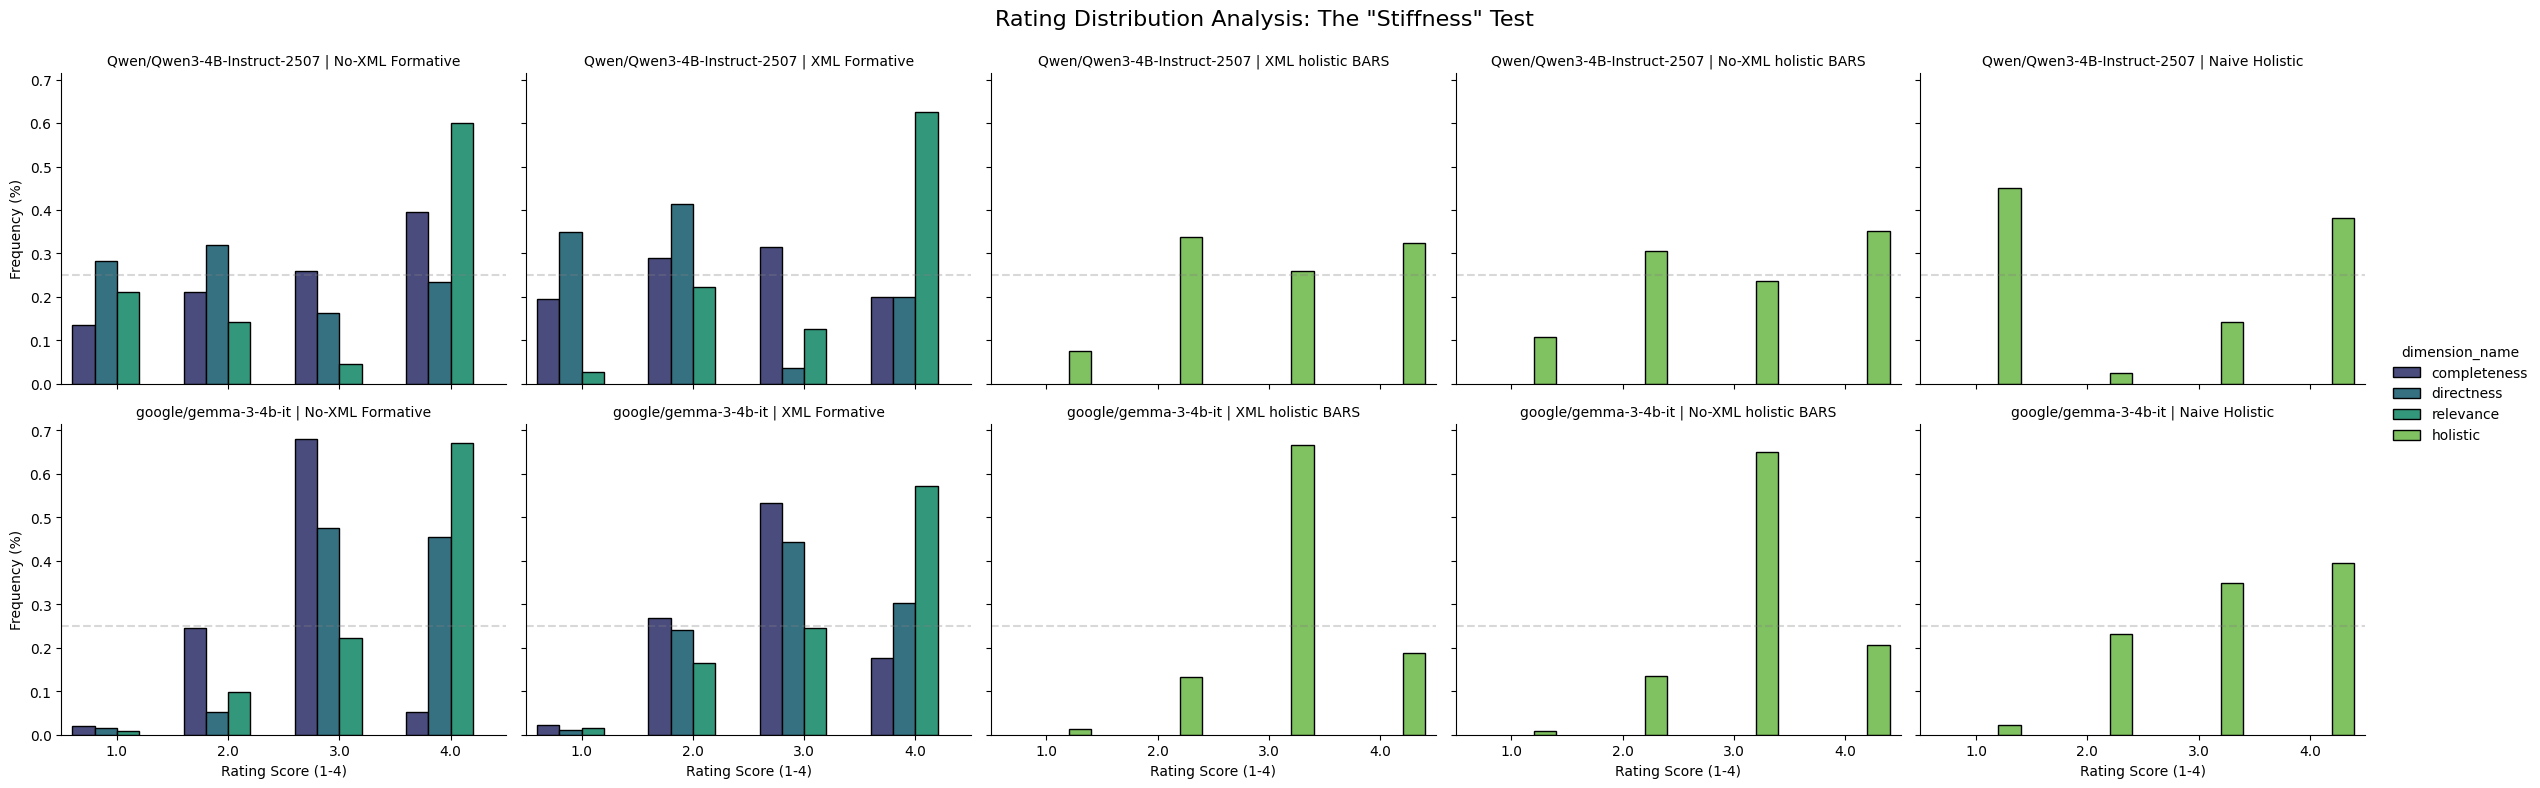

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define your groups
experimental_groups = ['model_name', 'prompt_id', 'dimension_name']

# 2. Calculate Normalized Counts (Percentage distribution of ratings 1-4)
# We use normalize=True to get percentages, which is better for comparing distributions
rating_dist = final_df.groupby(experimental_groups)['mode_rating'].value_counts(normalize=True).reset_index(name='percentage')

# 3. Map Prompt IDs to Readable Names (using your specific IDs)
prompt_map = {
    '2f16b595bed1': 'XML Formative',
    '080be5c39ffc': 'No-XML Formative',
    '83458ec049': 'Naive Holistic',
    '4a3297c956': 'XML holistic BARS',
    '5067939a72': 'No-XML holistic BARS' 
}
rating_dist['Prompt Type'] = rating_dist['prompt_id'].map(prompt_map)

# 4. Create the Plot
# Catplot allows us to Grid the data by Model (Row) and Prompt (Col)
g = sns.catplot(
    data=rating_dist,
    x='mode_rating',       # X-axis: The Rating (1, 2, 3, 4)
    y='percentage',        # Y-axis: Frequency
    hue='dimension_name',  # Color: The Dimension
    col='Prompt Type',     # Columns: Prompt Strategy
    row='model_name',      # Rows: Model Architecture
    kind='bar',
    height=4,
    aspect=1.2,
    palette='viridis',
    edgecolor='black'      # Adds a border to bars for readability
)

# 5. Formatting
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Rating Distribution Analysis: The "Stiffness" Test', fontsize=16)
g.set_axis_labels("Rating Score (1-4)", "Frequency (%)")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Add a reference line for "Even Distribution" (25%) if desired
for ax in g.axes.flat:
    ax.axhline(0.25, ls='--', color='gray', alpha=0.3)

plt.show()

In [23]:
final_df.groupby(experimental_groups)['diff_mean_mode'].describe().reset_index()

,model_name,prompt_id,dimension_name,count,mean,std,min,25%,50%,75%,max
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,1400.0,0.129557,0.156485,9.775162e-06,0.004126,0.063935,0.220066,0.975961
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,1400.0,0.151920,0.182278,6.914139e-06,0.005924,0.081504,0.250026,1.395279
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,1400.0,0.111613,0.213247,3.814697e-06,0.000067,0.003762,0.141504,1.498065
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,1400.0,0.081744,0.126649,8.344650e-07,0.001362,0.013903,0.103400,0.499832
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,1400.0,0.101006,0.176872,1.192093e-07,0.000679,0.013260,0.113007,1.194376
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,1400.0,0.044781,0.099310,0.000000e+00,0.000002,0.000141,0.024681,0.629801
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,1400.0,0.093835,0.136467,0.000000e+00,0.001225,0.021089,0.139902,0.959527
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,1400.0,0.146224,0.153740,3.790855e-05,0.013811,0.090188,0.245469,1.184006
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,1400.0,0.121708,0.216911,3.576279e-07,0.000328,0.009843,0.151831,1.416688
9,google/gemma-3-4b-it,080be5c39ffc,completeness,1400.0,0.041534,0.099235,0.000000e+00,0.000162,0.001017,0.016086,0.498530


## Formative evaluators

In [24]:
formative_df = final_df[(final_df['dimension_name'] != "holistic")]

### Distributional properties

- How are the dimensions distributed across the rating scale?

In below table we aggregate the number of times each model provided each rating, grouped by experimental categories. We would like to see an even distribution across the rating range, since that would mean that it has discriminant validity. Most models seem to exhibit a strong preference for one particular rating, which could point towards inability to accurately distinguish rating categories. Note that this distribution should be carefully interpreted in relationship to discriminant validity, since we do not know the 'true' distribution across the rating range- the real distribution might be uneven across options. 

We see that the assistant prefix matters a lot to the Qwen model. As a matter of fact, the distribution is so skewed when the assistant prefix is ommitted that we might consider it as a necessity. 

No surprises in the visualisation, the assistant prefix generally increases the logits of the answering scale greatly. This does not mean the rating is better per se though, I need to investigate this more, but it is successful in steering the model towards providing a rating. 

## Correlation between dimensions

Below we compute the correlations between the dimensions. Correlations are generally high, indicating that the dimensions are not orthogonal. We would like for them to measure truly independent features of the text, although it might be expected that they are related- good texts are probably good on all dimensions, not just on a single dimension.

Interesting to note is that the correlations do vary across models. Does this tell us that the models embed the dimensions differently?

In [25]:
df_wide = formative_df.pivot_table(
    index=['input_id'] + ['model_name', 'prompt_id'],
    columns='dimension_name',
    values='mode_rating'
)

dimension_correlations = df_wide.groupby(
    level=['model_name', 'prompt_id']).corr()


# 3. View the results
dimension_correlations.reset_index()

dimension_name,model_name,prompt_id,dimension_name,completeness,directness,relevance
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,1.000000,0.722601,0.754016
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,0.722601,1.000000,0.696576
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,0.754016,0.696576,1.000000
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,1.000000,0.687229,0.768173
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,0.687229,1.000000,0.595612
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,0.768173,0.595612,1.000000
6,google/gemma-3-4b-it,080be5c39ffc,completeness,1.000000,0.562504,0.587914
7,google/gemma-3-4b-it,080be5c39ffc,directness,0.562504,1.000000,0.634725
8,google/gemma-3-4b-it,080be5c39ffc,relevance,0.587914,0.634725,1.000000
9,google/gemma-3-4b-it,2f16b595bed1,completeness,1.000000,0.646577,0.637580


The differences between mode and mean are not large, but mean does better across the board, especially for mistral. We do see that the relevance dimension scores very high for all models. This might serve as substantiation for deconstructing the construct.

In [26]:
corr_mode_rating = final_df.groupby(experimental_groups)[
    ['score_1', 'mode_rating']].corr().reset_index()

In [27]:
corr_mean_rating = final_df.groupby(experimental_groups)[
    ['score_1', 'mean_rating']].corr().reset_index()

corr_mean_rating

,model_name,prompt_id,dimension_name,level_3,score_1,mean_rating
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,score_1,1.000000,0.552064
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,mean_rating,0.552064,1.000000
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,score_1,1.000000,0.535041
3,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,mean_rating,0.535041,1.000000
4,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,score_1,1.000000,0.567654
5,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,mean_rating,0.567654,1.000000
6,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,score_1,1.000000,0.620963
7,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,mean_rating,0.620963,1.000000
8,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,score_1,1.000000,0.505560
9,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,mean_rating,0.505560,1.000000


To-do:

I have designed the formative rater to be able to detect anomalies in QA pairs. The answers are matched to a question using an embedding model, and we see that sometimes it a seemingly good answer is retreived that upon closer inspection does not relate to the question at all. Based on the feedback the human raters have provided, we see that it occurs that one human rater did not catch the anomaly, while the other did. This results in maximal disagreement, where one rating is 4 and the other is 1. LLMs, especially smaller models, are prone to making these mistakes as well, but we hypothesize that by using deconstructive prompting we provide sufficient context to the model to catch the anomaly, even if it would have missed it with a holistic prompt. Essentially, the formative prompt models the anomalies explicitly. 

First of all, when the input is confusing (as would be the case with the anomalies), the model should be confused as well. Moreover, it should not be confused when we explicitly model the source of confusion. Entropy should therefore be higher for maximal disagreement items for the holistic prompt, whereas it should be lower for the formative prompt. This relies on the assumption that the model does not miss the anomaly entirely: in this case, it would be confidently wrong (low entropy). 

It will be interesting to see whether we have items with low relevance but high completeness, and see if there is some relationship between the human disagreement. 

# Results

## Inter-rater reliability

- Inter-rater reliability: 
    - Quadratic weighted kappa
        - Consider the mean Kappa between LLM <-> Human
    - Spearman correlation
        - Mean correlation between LLM <-> Human
    - Reliability gap:
        - difference between average LLM <-> Human metric and Human <-> Human metric




*Sidenote on the metrics*

We cannot safely say that we are measuring on an interval scale, since we cannot substantiate that the difference between 1-2 is the same as 3-4 (consider the "Pathology of Psychometrics" paper). QWK assumes ordinal data, while Spearman assumes interval data. 

### Quadratic-weighted Kappa

In [28]:
from src.analysis.reliability import ReliabilityAnalyzer

analyzer = ReliabilityAnalyzer(final_df, group_cols=[
                               'model_name', 'prompt_id', 'dimension_name'], llm_rating_col='mode_rating')
analyzer.compute_reliability_gap(metric='kappa')

,model_name,prompt_id,dimension_name,metric_type,kappa_gap,kappa_hh,kappa_llm_avg
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,Kappa,-0.006553,0.584559,0.591112
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,Kappa,0.062656,0.584559,0.521903
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,Kappa,0.077594,0.584559,0.506965
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,Kappa,0.084144,0.584559,0.500415
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,Kappa,0.096730,0.584559,0.487830
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,Kappa,0.099596,0.584559,0.484963
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,Kappa,0.108162,0.584559,0.476397
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,Kappa,0.146583,0.584559,0.437976
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,Kappa,0.203819,0.584559,0.380741
17,google/gemma-3-4b-it,83458ec049,holistic,Kappa,0.230050,0.584559,0.354509


### Spearman correlation

In [29]:
analyzer = ReliabilityAnalyzer(final_df, group_cols=[
                               'model_name', 'prompt_id', 'dimension_name'], llm_rating_col='mode_rating')
analyzer.compute_reliability_gap(metric='spearman')

,model_name,prompt_id,dimension_name,metric_type,spearman_gap,spearman_hh,spearman_llm_avg
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,Spearman,-0.020013,0.586907,0.606920
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,Spearman,0.011641,0.586907,0.575266
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,Spearman,0.036422,0.586907,0.550486
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,Spearman,0.039143,0.586907,0.547764
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,Spearman,0.057996,0.586907,0.528911
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,Spearman,0.061185,0.586907,0.525722
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,Spearman,0.073046,0.586907,0.513861
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,Spearman,0.086465,0.586907,0.500442
14,google/gemma-3-4b-it,2f16b595bed1,relevance,Spearman,0.088953,0.586907,0.497954
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,Spearman,0.098830,0.586907,0.488077


In [30]:
analyzer = ReliabilityAnalyzer(final_df, group_cols=[
                               'model_name', 'prompt_id', 'dimension_name'], llm_rating_col='mean_rating')
cor_results = analyzer.compute_reliability_gap(metric='spearman')
cor_results

,model_name,prompt_id,dimension_name,metric_type,spearman_gap,spearman_hh,spearman_llm_avg
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,Spearman,-0.033736,0.586907,0.620644
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,Spearman,-0.023610,0.586907,0.610518
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,Spearman,-0.007397,0.586907,0.594304
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,Spearman,-0.003743,0.586907,0.590650
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,Spearman,0.016304,0.586907,0.570603
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,Spearman,0.028613,0.586907,0.558294
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,Spearman,0.033664,0.586907,0.553243
14,google/gemma-3-4b-it,2f16b595bed1,relevance,Spearman,0.041597,0.586907,0.545311
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,Spearman,0.053667,0.586907,0.533240
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,Spearman,0.062588,0.586907,0.524319


## Internal consistency: Entropy

In [31]:
disagreement_col = ['human_disagreement', 'llm_disagreement_1', 'llm_disagreement_2', 'llm_disagreement_avg'][0]

In [32]:
final_df.groupby(['model_name', 'prompt_id', 'dimension_name'])[
    'normalized_entropy'].median().reset_index()

,model_name,prompt_id,dimension_name,normalized_entropy
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,0.231616
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,0.306141
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,0.017390
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,0.060650
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,0.060054
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,0.001418
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,0.084927
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,0.283753
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,0.042289
9,google/gemma-3-4b-it,080be5c39ffc,completeness,0.006446


- Correlates Entropy (Uncertainty) with Disagreement (Difficulty).

In [33]:
analyzer = ReliabilityAnalyzer(
    final_df, group_cols=['model_name', 'prompt_id', 'dimension_name'])
analyzer.analyze_calibration(disagreement_col)

,model_name,prompt_id,dimension_name,calibration_corr
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,0.093365
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,0.140224
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,0.034612
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,0.132197
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,0.153323
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,-0.010866
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,0.104960
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,0.129052
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,0.192564
9,google/gemma-3-4b-it,080be5c39ffc,completeness,-0.020320


In [34]:
analyzer = ReliabilityAnalyzer(final_df[(final_df.human_disagreement > 0) & (
    final_df.human_disagreement < 5)], group_cols=['model_name', 'prompt_id', 'dimension_name'])
analyzer.analyze_calibration(disagreement_col)

,model_name,prompt_id,dimension_name,calibration_corr
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,-0.108837
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,-0.016104
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,-0.046033
3,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,0.072588
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,0.124412
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,relevance,-0.043529
6,Qwen/Qwen3-4B-Instruct-2507,4a3297c956,holistic,0.051485
7,Qwen/Qwen3-4B-Instruct-2507,5067939a72,holistic,-0.030854
8,Qwen/Qwen3-4B-Instruct-2507,83458ec049,holistic,0.017294
9,google/gemma-3-4b-it,080be5c39ffc,completeness,-0.016123


In [35]:
final_df.groupby(['model_name', 'prompt_id', 'dimension_name'])[
    'mode_rating'].value_counts().reset_index()

,model_name,prompt_id,dimension_name,mode_rating,count
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,4.0,552
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,3.0,364
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,2.0,295
3,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,1.0,189
4,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,2.0,446
...,...,...,...,...,...
67,google/gemma-3-4b-it,5067939a72,holistic,1.0,12
68,google/gemma-3-4b-it,83458ec049,holistic,4.0,554
69,google/gemma-3-4b-it,83458ec049,holistic,3.0,490
70,google/gemma-3-4b-it,83458ec049,holistic,2.0,325


In [36]:
disagreement_entropy_med = final_df.groupby(['model_name', 'prompt_id', 'dimension_name',
                                              'human_disagreement'])['entropy'].median()

# 1. Ensure your series is sorted (crucial for .iloc[0] to be Disagreement=0)
disagreement_entropy_corr = disagreement_entropy_med.sort_index()

# 2. Compute normalized entropy with group_keys=False to preserve the original index
normalized_entropy = disagreement_entropy_med.groupby(
    ['model_name', 'prompt_id', 'dimension_name'],
    group_keys=False).apply(lambda x: x / x.iloc[0])

# 3. Combine them into a new DataFrame
result_df = pd.DataFrame({
    'raw_entropy': disagreement_entropy_med,
    'normalized_entropy': normalized_entropy
})

# Display the result
result_df.reset_index()

,model_name,prompt_id,dimension_name,human_disagreement,raw_entropy,normalized_entropy
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,0,0.253715,1.000000
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,1,0.399135,1.573163
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,2,0.368207,1.451264
3,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,3,0.179198,0.706295
4,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,0,0.322566,1.000000
...,...,...,...,...,...,...
67,google/gemma-3-4b-it,5067939a72,holistic,3,0.006807,1.142674
68,google/gemma-3-4b-it,83458ec049,holistic,0,0.015232,1.000000
69,google/gemma-3-4b-it,83458ec049,holistic,1,0.014826,0.973360
70,google/gemma-3-4b-it,83458ec049,holistic,2,0.010726,0.704162


In [37]:
import pandas as pd
import altair as alt

# 1. Load the dataset
df = pd.read_csv('disagreement_entropy_corr.csv')

# 2. Preprocess: Map prompt IDs to readable names
prompt_map = {
    '2f16b595bed1': 'XML Formative',
    '080be5c39ffc': 'No-XML Formative',
    '83458ec049': 'Naive Holistic'
    
}
df['Prompt Type'] = df['prompt_id'].map(prompt_map)

# 3. Calculate Normalized Entropy (Relative to Disagreement=0)
# We sort first to ensure the first item in each group is Disagreement=0
df = df.sort_values(['model_name', 'Prompt Type',
                    'dimension_name', 'human_disagreement'])

# Group by Model/Prompt/Dimension and divide by the first value (Disagreement=0)
df['normalized_entropy'] = df.groupby(
    ['model_name', 'Prompt Type', 'dimension_name']
)['entropy'].transform(lambda x: x / x.iloc[0])

# 4. Create the Interactive Plot
# We create a base chart with common encoding
base = alt.Chart(df).encode(
    x=alt.X('human_disagreement:O', title='Human Disagreement Level'),
    color=alt.Color('dimension_name:N', title='Dimension',
                    legend=alt.Legend(orient='bottom')),
    strokeDash=alt.StrokeDash(
        'Prompt Type:N', title='Prompt Type', legend=alt.Legend(orient='bottom')),
    tooltip=[
        alt.Tooltip('model_name', title='Model'),
        alt.Tooltip('Prompt Type', title='Prompt'),
        alt.Tooltip('dimension_name', title='Dimension'),
        alt.Tooltip('human_disagreement', title='Disagreement'),
        alt.Tooltip('entropy', title='Raw Entropy', format='.4f'),
        alt.Tooltip('normalized_entropy', title='Norm. Entropy', format='.2f')
    ]
)

# Chart A: Normalized Entropy (The "Calibration Shape")
norm_chart = base.mark_line(point=True).encode(
    y=alt.Y('normalized_entropy:Q', title='Normalized Entropy (Base=1.0)')
).properties(
    title='Normalized Entropy (Calibration Shape)',
    width=350,
    height=300
).facet(
    column=alt.Column('model_name:N', title='Model Architecture')
).interactive()

# Chart B: Raw Entropy (The absolute scale)
raw_chart = base.mark_line(point=True).encode(
    y=alt.Y('entropy:Q', title='Raw Entropy')
).properties(
    title='Raw Entropy (Absolute Uncertainty)',
    width=350,
    height=300
).facet(
    column=alt.Column('model_name:N', header=alt.Header(
        title=None, labels=False))
).interactive()

# Combine them vertically
final_chart = alt.vconcat(norm_chart, raw_chart).resolve_scale(y='independent')

# Save or Display
final_chart.save('interactive_entropy_plot.json')
final_chart.display()

c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\IPython\core\interactiveshell.py:3699: UserWarning: Automatically deduplicated selection parameter with identical configuration. If you want independent parameters, explicitly name them differently (e.g., name='param1', name='param2'). See https://github.com/vega/altair/issues/3891
  exec(code_obj, self.user_global_ns, self.user_ns)


alt.VConcatChart(...)


- Entropy and LLM-human disagreement (so far have only looked at human-human disagreement)

- Entropy and LLM rating

In [38]:
final_df.groupby(['model_name', 'prompt_id', 'dimension_name'])[
    ['entropy', 'mean_rating']].corr(method = 'spearman').reset_index()

,model_name,prompt_id,dimension_name,level_3,entropy,mean_rating
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,entropy,1.000000,-0.411514
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,completeness,mean_rating,-0.411514,1.000000
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,entropy,1.000000,0.098342
3,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,directness,mean_rating,0.098342,1.000000
4,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,entropy,1.000000,-0.773682
5,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,relevance,mean_rating,-0.773682,1.000000
6,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,entropy,1.000000,0.031914
7,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,completeness,mean_rating,0.031914,1.000000
8,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,entropy,1.000000,0.372276
9,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,directness,mean_rating,0.372276,1.000000


In [39]:
final_df[final_df['dimension_name'] == "relevance"].groupby(['model_name', 'prompt_id','mode_rating'])['entropy'].mean().reset_index()


,model_name,prompt_id,mode_rating,entropy
0,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,1.0,0.291320
1,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,2.0,0.764068
2,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,3.0,0.878939
3,Qwen/Qwen3-4B-Instruct-2507,080be5c39ffc,4.0,0.109032
4,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,1.0,0.301238
5,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,2.0,0.163300
6,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,3.0,0.435962
7,Qwen/Qwen3-4B-Instruct-2507,2f16b595bed1,4.0,0.032670
8,google/gemma-3-4b-it,080be5c39ffc,1.0,0.025504
9,google/gemma-3-4b-it,080be5c39ffc,2.0,0.142206



###The Conclusion: XML as a "Noise Filter" for Uncertainty
The most significant finding here is not about specific dimensions, but about the **Signal-to-Noise Ratio (SNR)** of your uncertainty metric.

####1. The Non-XML Prompt: "General Fog" (High Median, High Correlation)* **Observation:** The median entropy is high (~0.30).
* **Interpretation:** The model is experiencing a high baseline of "cognitive load." It is likely spending probability mass figuring out the *format* and *structure* of the prompt, in addition to the actual answer quality.
* **Result:** The entropy signal is a mix of **Epistemic Uncertainty** (Prompt Confusion) and **Aleatoric Uncertainty** (Data Ambiguity). The correlation exists because the Aleatoric signal is present, but it is "buried" in a generally noisy distribution.

####2. The XML Prompt: "Specific Alarm" (Low Median, High Correlation)* **Observation:** The median entropy collapses to near zero (~0.07), yet the correlation with human disagreement remains robust (0.18–0.24).
* **Interpretation:** The XML tags solve the "Epistemic" problem. The model knows *exactly* where the data is and what the task is, so it is not confused by the format. The baseline "formatting noise" disappears.
* **Result:** Because the baseline is so low, **any spike in entropy is highly significant.** When the entropy rises in the XML model, it is almost exclusively reacting to the **Aleatoric Uncertainty** (the difficulty of the content).

###Thesis ArgumentYou can present this as a methodological finding regarding **Calibration**:

> *"We observed a distinct distributional shift in model uncertainty between the two prompting strategies. The naive (non-XML) prompt yielded a high median entropy (~0.30), suggesting the model retained significant epistemic uncertainty regarding the task structure. In contrast, the XML-structured prompt successfully suppressed this baseline uncertainty, reducing the median entropy to ~0.07.*
> *Crucially, despite this massive drop in overall uncertainty, the XML prompt maintained a positive correlation with human disagreement (r \approx 0.18-0.24). This indicates that **XML tagging acts as a high-pass filter for uncertainty**: it eliminates the 'background noise' of formatting confusion, ensuring that high-entropy states are specific indicators of genuine data ambiguity (aleatoric uncertainty), rather than model confusion."*

###Why this is scientifically safer1. **It avoids speculation:** You don't have to guess why "Completeness" behaved differently than "Directness." You simply note that *both* retained positive signal despite the baseline shift.
2. **It explains the "Outliers":** You correctly noted that "when it is high, disagreement is also high." This supports the idea that in the XML model, high entropy is an **Event**, whereas in the non-XML model, high entropy is the **Norm**.
3. **It justifies the method:** It argues that XML is superior not just because it follows instructions better, but because it produces a **cleaner uncertainty signal** for detecting hard samples.

---------

# Regression: fitting formative to human ratings

In [44]:
import pandas as pd
import statsmodels.formula.api as smf

# ---------------------------------------------------------
# 1. Setup & Filtering
# ---------------------------------------------------------
# Filter for the specific model/prompt configuration you want to validate
# (e.g., Qwen with XML Prompt). Adjust IDs as necessary.
target_model = 'Qwen/Qwen3-4B-Instruct-2507'
target_prompt = '2f16b595bed1' # XML Formative

# Filter the long dataframe
subset_df = final_df[
    (final_df['model_name'] == target_model) & 
    (final_df['prompt_id'] == target_prompt) & 
    (final_df['dimension_name'] != 'holistic')
].copy()

# ---------------------------------------------------------
# 2. Pivot: Long -> Wide
# ---------------------------------------------------------
# We assume 'question_id' is the unique key for the QA pair.
# We keep 'human_rating' in the index so it stays attached to the row.
df_wide = subset_df.pivot_table(
    index= ['input_id', 'score_1'], 
    columns='dimension_name', 
    values='mean_rating'  # Using the weighted mean as discussed
).reset_index()

# Rename columns to remove spaces if necessary (e.g. if names are clean)
df_wide.columns.name = None 

# ---------------------------------------------------------
# 3. Basic OLS Regression
# ---------------------------------------------------------
# Model: Human Rating ~ LinComb(Dimensions)
formula = "score_1 ~ relevance + directness + completeness"

model = smf.ols(formula, data=df_wide).fit()

print(f"--- Regression Results ({target_model}) ---")
print(model.summary())

# ---------------------------------------------------------
# 4. Diagnostic Check (Multicollinearity)
# ---------------------------------------------------------
# Since dimensions are correlated (r=0.8), check correlation matrix
print("\n--- Predictor Correlation Matrix ---")
print(df_wide[['relevance', 'directness', 'completeness']].corr())

--- Regression Results (Qwen/Qwen3-4B-Instruct-2507) ---
                            OLS Regression Results                            
Dep. Variable:                score_1   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     310.4
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          2.25e-154
Time:                        13:40:40   Log-Likelihood:                -1968.2
No. Observations:                1400   AIC:                             3944.
Df Residuals:                    1396   BIC:                             3965.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [48]:
final_df.columns

Index(['Unnamed: 0', 'question', 'passage', 'feedback', 'rating', 'domain',
       'review_1', 'explanation_1', 'review_2', 'explanation_2', 'score_1',
       'score_2', 'answer', 'input_id', 'prompt_id', 'dimension_name',
       'assistant_prefix', 'input_length', 'model_name', 'top_k',
       'constrained_token_ids', 'sequences', 'top_k_logits',
       'constrained_logits', 'top_k_tokens', 'constrained_tokens',
       'sorted_tokens', 'sorted_logits', 'mean_rating', 'mode_rating',
       'mean_human_rating', 'entropy', 'normalized_entropy',
       'human_disagreement', 'llm_disagreement_1', 'llm_disagreement_2',
       'llm_disagreement_avg', 'diff_mean_mode', 'token_count'],
      dtype='object')

In [52]:
df_pivot

dimension_name,input_id,mean_human_rating,completeness,directness,relevance
0,001ee3af01d8cb88,1.0,1.000278,1.000425,2.000150
1,0041a2b78e0d9b90,1.5,3.001774,2.003535,3.999989
2,007a00beca3e22e4,1.0,2.183257,1.997289,3.997363
3,007caa4f1895f8b0,2.5,3.160131,2.018574,3.993185
4,0092f95ece6b5484,3.5,2.051223,2.011519,3.999990
...,...,...,...,...,...
1395,ff12bb00206c0971,4.0,3.578602,2.149098,3.999998
1396,ff2285fe603f484c,1.0,1.000630,1.000030,1.934709
1397,ff30ca37673d236c,1.0,1.008548,1.000022,1.899678
1398,ffbee8c0a0f5c10f,2.5,3.000506,3.518693,3.999999


In [60]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

# 1. Filter for the specific model to ensure apples-to-apples comparison
model_df = final_df[final_df['model_name'] == 'Qwen/Qwen3-4B-Instruct-2507']

# --- Step A: Prepare Formative Data (Features) ---
# Filter for Formative Prompt ID
df_formative = model_df[model_df['prompt_id'] == '2f16b595bed1'].pivot_table(
    index='input_id', 
    columns=['dimension_name', 'normalized_entropy'], 
    values=['mean_rating']
).reset_index()

# Rename columns to ensure they are Python-friendly (no spaces) if necessary
# Assuming columns are 'relevance', 'completeness', 'directness'

# --- Step B: Prepare Holistic Data (Baseline) ---
# Filter for Holistic Prompt ID
df_holistic = model_df[model_df['prompt_id'] == '4a3297c956'][['input_id', 'mean_rating']]
df_holistic = df_holistic.rename(columns={'mean_rating': 'holistic_score'})

# --- Step C: Get Target Variable (Human Consensus) ---
# We can extract this from any slice since it's constant per input_id
df_targets = model_df[['input_id', 'mean_human_rating']].drop_duplicates()

# --- Step D: Merge Everything ---
# Inner joins ensure we only analyze rows where we have ALL pieces of data
data = df_formative.merge(df_holistic, on='input_id', how='inner')
data = data.merge(df_targets, on='input_id', how='inner')

# --- Step E: Train/Test Split ---
train, test = train_test_split(data, test_size=0.2, random_state=42)

# --- Step F: Model 1 - Formative (The Thesis Contribution) ---
# Does decomposing the task explain more variance?
# Note: Check your exact column names from the pivot. I assume 'relevance', 'directness', 'completeness'
formative_model = smf.ols(
    "mean_human_rating ~ relevance + directness + completeness", 
    data=train
).fit()

# --- Step G: Model 2 - Holistic (The Baseline) ---
# Does a single generic prompt work as well?
holistic_model = smf.ols(
    "mean_human_rating ~ holistic_score", 
    data=train
).fit()

# --- Step H: Evaluation & Reporting ---
test['pred_formative'] = formative_model.predict(test)
test['pred_holistic'] = holistic_model.predict(test)

def get_metrics(y_true, y_pred, model_label):
    mse = mean_squared_error(y_true, y_pred)
    pearson, _ = pearsonr(y_true, y_pred)
    spearman, _ = spearmanr(y_true, y_pred)
    return {
        "Model Architecture": model_label,
        "MSE": round(mse, 4),
        "Pearson r": round(pearson, 4),
        "Spearman rho": round(spearman, 4)
    }

results_table = pd.DataFrame([
    get_metrics(test['mean_human_rating'], test['pred_holistic'], "Holistic (Baseline)"),
    get_metrics(test['mean_human_rating'], test['pred_formative'], "Formative (Ours)")
])

print("--- THESIS RESULTS: Model Comparison ---")
print(results_table)

print("\n--- FORMATIVE WEIGHTS (Interpretation) ---")
print(formative_model.summary().tables[1])

print("\n--- HOLISTIC WEIGHTS (Interpretation) ---")
print(holistic_model.summary().tables[1])

MergeError: Not allowed to merge between different levels. (3 levels on the left, 1 on the right)

In [136]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

# 1. Filter for the specific model to ensure apples-to-apples comparison
model_df = final_df[final_df['model_name'] == 'Qwen/Qwen3-4B-Instruct-2507']

# --- Step A: Prepare Formative Data (Features) ---
# Filter for Formative Prompt ID
df_formative = model_df[model_df['prompt_id'] == '2f16b595bed1'].pivot_table(
    index='input_id', 
    columns='dimension_name', 
    values='mean_rating'
).reset_index()

# Rename columns to ensure they are Python-friendly (no spaces) if necessary
# Assuming columns are 'relevance', 'completeness', 'directness'

# --- Step B: Prepare Holistic Data (Baseline) ---
# Filter for Holistic Prompt ID
df_holistic = model_df[model_df['prompt_id'] == '4a3297c956'][['input_id', 'mean_rating']]
df_holistic = df_holistic.rename(columns={'mean_rating': 'holistic_score'})

# --- Step C: Get Target Variable (Human Consensus) ---
# We can extract this from any slice since it's constant per input_id
df_targets = model_df[['input_id', 'mean_human_rating']].drop_duplicates()

# --- Step D: Merge Everything ---
# Inner joins ensure we only analyze rows where we have ALL pieces of data
data = df_formative.merge(df_holistic, on='input_id', how='inner')
data = data.merge(df_targets, on='input_id', how='inner')

# --- Step E: Train/Test Split ---
train, test = train_test_split(data, test_size=0.2, random_state=42)

# --- Step F: Model 1 - Formative (The Thesis Contribution) ---
# Does decomposing the task explain more variance?
# Note: Check your exact column names from the pivot. I assume 'relevance', 'directness', 'completeness'
formative_model = smf.ols(
    "mean_human_rating ~ relevance + ( directness + completeness)", 
    data=train
).fit()

# --- Step G: Model 2 - Holistic (The Baseline) ---
# Does a single generic prompt work as well?
holistic_model = smf.ols(
    "mean_human_rating ~ holistic_score", 
    data=train
).fit()

# --- Step H: Evaluation & Reporting ---
test['pred_formative'] = formative_model.predict(test)
test['pred_holistic'] = holistic_model.predict(test)

def get_metrics(y_true, y_pred, model_label):
    mse = mean_squared_error(y_true, y_pred)
    pearson, _ = pearsonr(y_true, y_pred)
    spearman, _ = spearmanr(y_true, y_pred)
    return {
        "Model Architecture": model_label,
        "MSE": round(mse, 4),
        "Pearson r": round(pearson, 4),
        "Spearman rho": round(spearman, 4)
    }

results_table = pd.DataFrame([
    get_metrics(test['mean_human_rating'], test['pred_holistic'], "Holistic (Baseline)"),
    get_metrics(test['mean_human_rating'], test['pred_formative'], "Formative (Ours)")
])

print("--- THESIS RESULTS: Model Comparison ---")
print(results_table)

print("\n--- FORMATIVE WEIGHTS (Interpretation) ---")
print(formative_model.summary().tables[1])

print("\n--- HOLISTIC WEIGHTS (Interpretation) ---")
print(holistic_model.summary().tables[1])

--- THESIS RESULTS: Model Comparison ---
    Model Architecture     MSE  Pearson r  Spearman rho
0  Holistic (Baseline)  0.7148     0.6560        0.6888
1     Formative (Ours)  0.6289     0.7055        0.7119

--- FORMATIVE WEIGHTS (Interpretation) ---
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1613      0.095      1.694      0.091      -0.026       0.348
relevance        0.1971      0.045      4.369      0.000       0.109       0.286
directness       0.0754      0.033      2.271      0.023       0.010       0.140
completeness     0.5802      0.045     12.812      0.000       0.491       0.669

--- HOLISTIC WEIGHTS (Interpretation) ---
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2046      0.078      2.617     

In [177]:
full_model_df = final_df[['input_id', 'prompt_id', 'model_name', 'mean_human_rating', 'mode_rating', 'mean_rating', 'dimension_name', 'normalized_entropy']]

# Subset Qwen model for now, make it variable
subs_model_df = full_model_df[full_model_df['model_name'] == 'Qwen/Qwen3-4B-Instruct-2507']
# Check out the XML prompts first
subs_model_df = subs_model_df[subs_model_df['prompt_id'].isin(['2f16b595bed1', '4a3297c956'])]

model_df_wide = subs_model_df.pivot_table(index = ['input_id', 'mean_human_rating', 'model_name'],
                                     columns = 'dimension_name',
                                     values = ['normalized_entropy', 'mean_rating']).reset_index()

model_df_wide.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in model_df_wide.columns.values]


In [131]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# --- Model A: Holistic Baseline ---
# Note: Check your exact column name. I assume 'mean_rating_holistic' based on your pivot.
mod_holistic = smf.ols(
    "mean_human_rating ~ mean_rating_holistic", 
    data=model_df_wide
).fit()

# --- Model B: Formative Model ---
mod_formative = smf.ols(
    "mean_human_rating ~ mean_rating_relevance + mean_rating_directness + mean_rating_completeness", 
    data=model_df_wide
).fit()

# --- Model C: Formative + Uncertainty (Optional Bonus) ---
# Does the entropy (confusion) of the model predict human ratings?
mod_entropy = smf.ols(
    "mean_human_rating ~ mean_rating_relevance * mean_rating_completeness + mean_rating_directness + normalized_entropy_relevance", 
    data=model_df_wide
).fit()

# --- Compare Results ---
print("\n=== HOLISTIC BASELINE ===")
print(f"R-squared: {mod_holistic.rsquared:.4f}")
print(f"MSE: {mean_squared_error(model_df_wide['mean_human_rating'], mod_holistic.fittedvalues):.4f}")

print("\n=== FORMATIVE MODEL (OURS) ===")
print(f"R-squared: {mod_formative.rsquared:.4f}")
print(f"MSE: {mean_squared_error(model_df_wide['mean_human_rating'], mod_formative.fittedvalues):.4f}")
print("\nCoefficients:")
print(mod_formative.params)


=== HOLISTIC BASELINE ===
R-squared: 0.4475
MSE: 0.6929

=== FORMATIVE MODEL (OURS) ===
R-squared: 0.4911
MSE: 0.6382

Coefficients:
Intercept                   0.125564
mean_rating_relevance       0.209503
mean_rating_directness      0.071161
mean_rating_completeness    0.576447
dtype: float64


In [133]:
mod_holistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mean_human_rating   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1132.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          2.42e-182
Time:                        14:52:41   Log-Likelihood:                -1729.7
No. Observations:                1400   AIC:                             3463.
Df Residuals:                    1398   BIC:                             3474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1908      0.070      2.718      0.007       0.053       0.328
mean_rating_holistic     0.7938      0.024     33.651      0.000       0.748       0.840
==============================================================================
Omnibus:                       10.856   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.600
Skew:                           0.018   Prob(JB):                       0.0224
Kurtosis:                       2.641   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
mod_entropy = smf.ols(
    "mean_human_rating ~ mean_rating_relevance + normalized_entropy_relevance + " \
    "mean_rating_completeness + normalized_entropy_completeness + " \
    "mean_rating_directness + normalized_entropy_directness ", 
    data=model_df_wide
).fit()

mod_entropy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mean_human_rating   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     225.8
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          1.88e-201
Time:                        14:58:48   Log-Likelihood:                -1669.5
No. Observations:                1400   AIC:                             3353.
Df Residuals:                    1393   BIC:                             3390.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.1868      0.097      1.931      0.054      -0.003       0.377
mean_rating_relevance               0.1921      0.041      4.681      0.000       0.112       0.273
normalized_entropy_relevance       -0.2607      0.158     -1.649      0.099      -0.571       0.049
mean_rating_completeness            0.5732      0.042     13.792      0.000       0.492       0.655
normalized_entropy_completeness     0.2194      0.131      1.679      0.093      -0.037       0.476
mean_rating_directness              0.0693      0.031      2.270      0.023       0.009       0.129
normalized_entropy_directness       0.0010      0.107      0.009      0.993      -0.209       0.211
==============================================================================
Omnibus:                        4.121   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.743
Skew:                          -0.069   Prob(JB):                        0.154
Kurtosis:                       2.787   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
mod_entropy = smf.ols(
    "mean_human_rating ~ mean_rating_relevance * normalized_entropy_relevance + " \
    "mean_rating_completeness +" \
    "mean_rating_directness ", 
    data=model_df_wide
).fit()

mod_entropy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mean_human_rating   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     273.9
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          3.46e-204
Time:                        14:59:56   Log-Likelihood:                -1666.0
No. Observations:                1400   AIC:                             3344.
Df Residuals:                    1394   BIC:                             3375.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.0239      0.111      0.215      0.829      -0.193       0.241
mean_rating_relevance                                  0.2718      0.046      5.911      0.000       0.182       0.362
normalized_entropy_relevance                           1.6111      0.615      2.619      0.009       0.404       2.818
mean_rating_relevance:normalized_entropy_relevance    -0.6395      0.205     -3.124      0.002      -1.041      -0.238
mean_rating_completeness                               0.5496      0.042     13.204      0.000       0.468       0.631
mean_rating_directness                                 0.0577      0.031      1.892      0.059      -0.002       0.118
==============================================================================
Omnibus:                        1.973   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.956
Skew:                          -0.052   Prob(JB):                        0.376
Kurtosis:                       2.850   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
"mean_human_rating ~ mean_rating_relevance * (mean_rating_completeness + mean_rating_directness)"

np.float64(0.6353456568956535)

In [142]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Define the models based on our psychometric hypotheses
models_to_test = {
    "Holistic Baseline": 
        "mean_human_rating ~ mean_rating_holistic",
        
    "Simple Formative (Additive)": 
        "mean_human_rating ~ mean_rating_relevance + mean_rating_completeness + mean_rating_directness",
        
    "Semantic Gating (Interactions)": 
        "mean_human_rating ~ mean_rating_relevance * (mean_rating_completeness + mean_rating_directness)",
        
    "Entropy Penalty (All Dimensions)": 
        "mean_human_rating ~ mean_rating_relevance + mean_rating_completeness + mean_rating_directness + " \
        "normalized_entropy_relevance + normalized_entropy_completeness + normalized_entropy_directness",
        
    "Relevance Trust (Interaction)": 
        "mean_human_rating ~ mean_rating_relevance * normalized_entropy_relevance + " \
        "mean_rating_completeness + mean_rating_directness"
}

# 2. Function to evaluate and collect metrics
def evaluate_models(df, formulas):
    results = []
    
    for name, formula in formulas.items():
        # Fit model
        res = smf.ols(formula, data=df).fit()
        
        # Predictions
        preds = res.fittedvalues
        y_true = df['mean_human_rating']
        
        # Calculate Metrics
        results.append({
            "Model Name": name,
            "R-squared": res.rsquared,
            "Adj. R-squared": res.rsquared_adj,
            "MSE": mean_squared_error(y_true, preds),
            "AIC": res.aic,  # Lower is better (measures parsimony)
            "Condition No.": res.condition_number # Check for multicollinearity
        })
        
    return pd.DataFrame(results).sort_values("MSE")

# 3. Run the evaluation
comparison_table = evaluate_models(model_df_wide, models_to_test)

# 4. Format and Print
print("=== PSYCHOMETRIC MODEL COMPARISON ===")
# Rounding for readability
print(comparison_table.round(4).to_string(index=False))

=== PSYCHOMETRIC MODEL COMPARISON ===
                      Model Name  R-squared  Adj. R-squared    MSE       AIC  Condition No.
  Semantic Gating (Interactions)     0.5038          0.5021 0.6223 3320.8623       217.4001
   Relevance Trust (Interaction)     0.4956          0.4938 0.6326 3343.9945       152.8690
Entropy Penalty (All Dimensions)     0.4931          0.4909 0.6358 3352.9337        39.3455
     Simple Formative (Additive)     0.4911          0.4900 0.6382 3352.2207        21.0574
               Holistic Baseline     0.4475          0.4471 0.6929 3463.3782        10.3431


In [153]:
# 1. Create Mean-Centered versions of the predictors
for col in ['mean_rating_relevance', 'mean_rating_completeness', 'mean_rating_directness']:
    model_df_wide[f'{col}_c'] = model_df_wide[col] - model_df_wide[col].mean()

# 2. Update the winning formula with centered variables
# (A * B) centered = A_c + B_c + (A_c * B_c)
winning_formula_centered = "mean_human_rating ~ mean_rating_relevance_c * " \
                           "(mean_rating_completeness_c + mean_rating_directness_c)"

# 3. Fit the final model
final_psych_model = smf.ols(winning_formula_centered, data=model_df_wide).fit()

print("=== FINAL THESIS MODEL: CENTERED SEMANTIC GATING ===")
print(f"R-squared: {final_psych_model.rsquared:.4f}")
print(f"AIC: {final_psych_model.aic:.4f}")
print(f"Condition Number: {final_psych_model.condition_number:.4f} (SUCCESS: < 30)")
print("\n--- Model Coefficients ---")
print(final_psych_model.params)

=== FINAL THESIS MODEL: CENTERED SEMANTIC GATING ===
R-squared: 0.5038
AIC: 3320.8623
Condition Number: 6.8683 (SUCCESS: < 30)

--- Model Coefficients ---
Intercept                                             2.233595
mean_rating_relevance_c                               0.506895
mean_rating_completeness_c                            0.505401
mean_rating_directness_c                             -0.005239
mean_rating_relevance_c:mean_rating_completeness_c    0.187318
mean_rating_relevance_c:mean_rating_directness_c      0.109195
dtype: float64


In [154]:
final_psych_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mean_human_rating   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     283.1
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          3.54e-209
Time:                        15:19:52   Log-Likelihood:                -1654.4
No. Observations:                1400   AIC:                             3321.
Df Residuals:                    1394   BIC:                             3352.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              2.2336      0.040     56.412      0.000       2.156       2.311
mean_rating_relevance_c                                0.5069      0.064      7.899      0.000       0.381       0.633
mean_rating_completeness_c                             0.5054      0.045     11.251      0.000       0.417       0.594
mean_rating_directness_c                              -0.0052      0.042     -0.125      0.901      -0.087       0.077
mean_rating_relevance_c:mean_rating_completeness_c     0.1873      0.051      3.698      0.000       0.088       0.287
mean_rating_relevance_c:mean_rating_directness_c       0.1092      0.061      1.797      0.073      -0.010       0.228
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.185
Skew:                          -0.001   Prob(JB):                        0.912
Kurtosis:                       2.944   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# 1. Create Mean-Centered versions of the predictors
for col in ['mean_rating_relevance', 'mean_rating_completeness', 'mean_rating_directness']:
    model_df_wide[f'{col}_c'] = model_df_wide[col] - model_df_wide[col].mean()

# 2. Update the winning formula with centered variables
# (A * B) centered = A_c + B_c + (A_c * B_c)
winning_formula_centered = "mean_human_rating ~ mean_rating_relevance_c * " \
                           "(mean_rating_completeness_c) + mean_rating_directness_c"

# 3. Fit the final model
final_psych_model = smf.ols(winning_formula_centered, data=model_df_wide).fit()

print("=== FINAL THESIS MODEL: CENTERED SEMANTIC GATING ===")
print(f"R-squared: {final_psych_model.rsquared:.4f}")
print(f"AIC: {final_psych_model.aic:.4f}")
print(f"Condition Number: {final_psych_model.condition_number:.4f} (SUCCESS: < 30)")
print("\n--- Model Coefficients ---")
print(final_psych_model.params)

=== FINAL THESIS MODEL: CENTERED SEMANTIC GATING ===
R-squared: 0.5027
AIC: 3322.1015
Condition Number: 6.1396 (SUCCESS: < 30)

--- Model Coefficients ---
Intercept                                             2.261074
mean_rating_relevance_c                               0.465792
mean_rating_completeness_c                            0.485813
mean_rating_relevance_c:mean_rating_completeness_c    0.238498
mean_rating_directness_c                              0.046835
dtype: float64


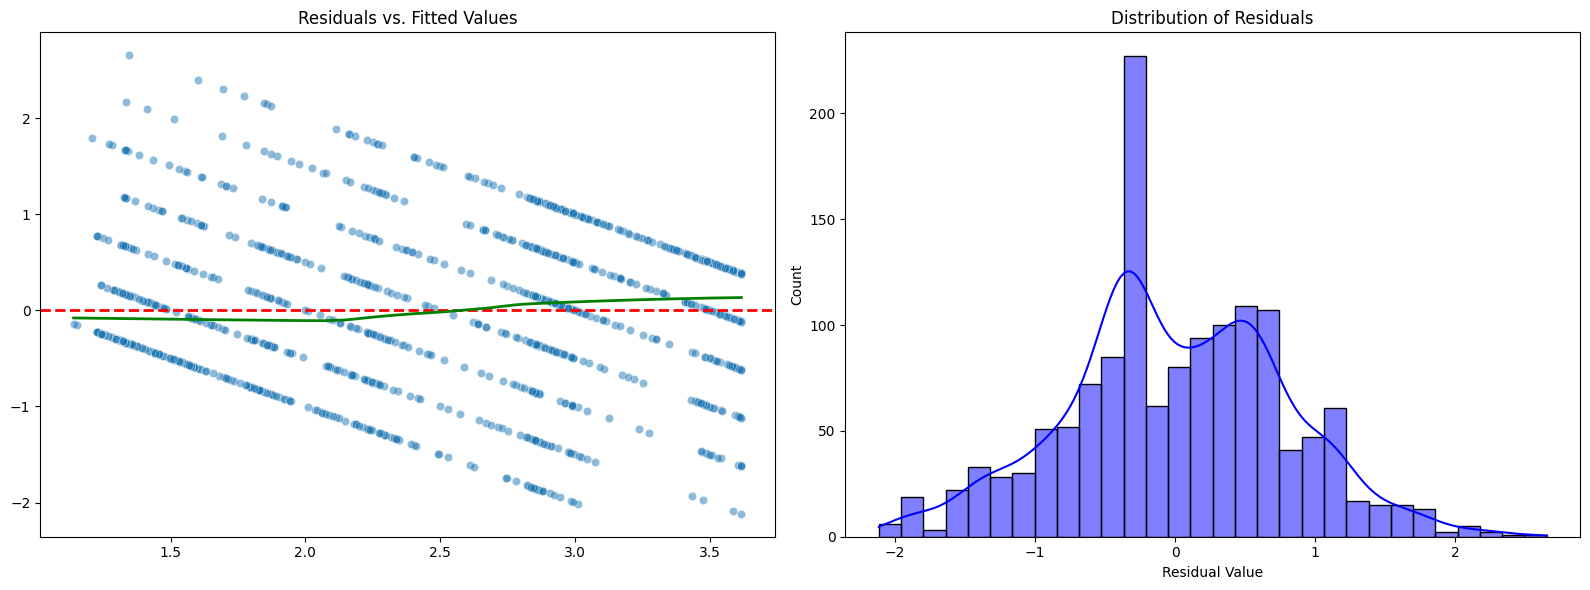

Shapiro-Wilk Test: Statistic=0.9945, p-value=5.307e-05


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats

# 1. Fit the model (using your winning formula)
winning_formula_centered = "mean_human_rating ~ mean_rating_relevance_c * " \
                           "(mean_rating_completeness_c) + mean_rating_relevance_c:mean_rating_directness_c"

model = smf.ols(winning_formula_centered, data=model_df_wide).fit()

# 2. Calculate Fitted Values and Residuals
fitted_values = model.fittedvalues
residuals = model.resid

# 3. Create the Diagnostic Plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Residuals vs. Fitted (Checks Homoscedasticity & Linearity) ---
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.5, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Residuals vs. Fitted Values')
axes[0].set_xlabel('Predicted Scores')
axes[0].set_ylabel('Residuals (Errors)')

# Add a Lowess line (smooth fit) to see if there is a curve in the errors
sns.regplot(x=fitted_values, y=residuals, scatter=False, ci=False, 
            lowess=True, line_kws={'color': 'green', 'linewidth': 2}, ax=axes[0])

# --- Plot 2: Histogram of Residuals (Checks Normality) ---
sns.histplot(residuals, kde=True, ax=axes[1], color='blue', bins=30)
axes[1].set_title('Distribution of Residuals')
axes[1].set_xlabel('Residual Value')

# 4. Display
plt.tight_layout()
plt.show()

# Optional: Shapiro-Wilk test for Normality (Formal check)
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4g}")

---------

In [262]:
full_model_df

,input_id,prompt_id,model_name,mean_human_rating,mode_rating,mean_rating,dimension_name,normalized_entropy
0,eff9e000675931f5,080be5c39ffc,google/gemma-3-4b-it,3.0,2.0,2.431805,relevance,0.493882
1,eff9e000675931f5,080be5c39ffc,google/gemma-3-4b-it,3.0,2.0,2.000572,completeness,0.003545
2,eff9e000675931f5,080be5c39ffc,google/gemma-3-4b-it,3.0,2.0,2.000323,directness,0.002364
3,eff9e000675931f5,2f16b595bed1,google/gemma-3-4b-it,3.0,2.0,2.000827,relevance,0.005949
4,eff9e000675931f5,2f16b595bed1,google/gemma-3-4b-it,3.0,2.0,2.000013,completeness,0.002863
...,...,...,...,...,...,...,...,...
25195,107c254c91eef764,2f16b595bed1,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.999918,completeness,0.000617
25196,107c254c91eef764,2f16b595bed1,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.433462,directness,0.687251
25197,107c254c91eef764,4a3297c956,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.999977,holistic,0.000193
25198,107c254c91eef764,5067939a72,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.999518,holistic,0.002870


In [ ]:
full_model_df = final_df[['input_id', 'prompt_id', 'model_name', 'mean_human_rating', 'mode_rating', 'mean_rating', 'dimension_name', 'normalized_entropy']]

# Subset Qwen model for now, make it variable
subs_model_df = full_model_df[full_model_df['model_name'] == 'Qwen/Qwen3-4B-Instruct-2507']
# Check out the XML prompts first
subs_model_df = subs_model_df[subs_model_df['prompt_id'].isin(['2f16b595bed1', '4a3297c956'])]

model_df_wide = subs_model_df.pivot_table(index = ['input_id', 'mean_human_rating', 'model_name'],
                                     columns = 'dimension_name',
                                     values = ['normalized_entropy', 'mean_rating']).reset_index()

model_df_wide.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in model_df_wide.columns.values]


In [269]:
group_df['dimension_name'].unique() == 'holistic'

array([ True])

In [282]:
full_model_df

,input_id,prompt_id,model_name,mean_human_rating,mode_rating,mean_rating,dimension_name,normalized_entropy
0,eff9e000675931f5,080be5c39ffc,google/gemma-3-4b-it,3.0,2.0,2.431805,relevance,0.493882
1,eff9e000675931f5,080be5c39ffc,google/gemma-3-4b-it,3.0,2.0,2.000572,completeness,0.003545
2,eff9e000675931f5,080be5c39ffc,google/gemma-3-4b-it,3.0,2.0,2.000323,directness,0.002364
3,eff9e000675931f5,2f16b595bed1,google/gemma-3-4b-it,3.0,2.0,2.000827,relevance,0.005949
4,eff9e000675931f5,2f16b595bed1,google/gemma-3-4b-it,3.0,2.0,2.000013,completeness,0.002863
...,...,...,...,...,...,...,...,...
25195,107c254c91eef764,2f16b595bed1,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.999918,completeness,0.000617
25196,107c254c91eef764,2f16b595bed1,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.433462,directness,0.687251
25197,107c254c91eef764,4a3297c956,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.999977,holistic,0.000193
25198,107c254c91eef764,5067939a72,Qwen/Qwen3-4B-Instruct-2507,3.0,4.0,3.999518,holistic,0.002870


In [291]:
prompt_hash_map = {
    "080be5c39ffc": "formative BARS no XML",
    "2f16b595bed1": "formative BARS XML",
    "4a3297c956":   "holistic BARS XML",
    "5067939a72":   "holistic BARS no XML",
    "83458ec049":   "holistic baseline (naive)"
}


models = {}

for group_key, group_df in full_model_df.groupby(['model_name', 'prompt_id']):
    if group_df['dimension_name'].unique()[0] == 'holistic':
        formula = 'mean_human_rating ~ mean_rating'
        group_df_wide = group_df
    else:
        group_df_wide = group_df.pivot_table(index = ['input_id', 'mean_human_rating', 'model_name'],
                                     columns = 'dimension_name',
                                     values = ['normalized_entropy', 'mean_rating']).reset_index()
        group_df_wide.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in group_df_wide.columns.values]
        formula = "mean_human_rating ~ mean_rating_relevance + mean_rating_completeness + mean_rating_directness"
        
    model = smf.ols(formula, data=group_df_wide).fit()

    models[str(f"{group_key[0]}_{prompt_hash_map[group_key[1]]}")] = model



In [299]:
import ipywidgets as widgets
from IPython.display import display, clear_output


def interactive_dataframe_selector(data_dict, description="Select option:"):
    # label -> value pairs; value is the tuple key
    options = [k for k in data_dict.keys()]
    dropdown = widgets.Dropdown(
        options=options,
        description=description,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )

    def update_table(change):
        clear_output(wait=True)
        display(dropdown)
        display(data_dict[change.new].summary())

    dropdown.observe(update_table, names='value')
    display(dropdown)
    display(data_dict[dropdown.value].summary())



In [ ]:
interactive_dataframe_selector(models)

Dropdown(description='Select option:', index=9, layout=Layout(width='400px'), options=('Qwen/Qwen3-4B-Instruct…

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mean_human_rating   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     551.2
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          4.97e-103
Time:                        17:46:04   Log-Likelihood:                -1912.3
No. Observations:                1400   AIC:                             3829.
Df Residuals:                    1398   BIC:                             3839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1529      0.100      1.525      0.128      -0.044       0.350
mean_rating     0.7306      0.031     23.478      0.000       0.670       0.792
==============================================================================
Omnibus:                       52.935   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.495
Skew:                          -0.070   Prob(JB):                     4.80e-06
Kurtosis:                       2.367   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
models

{'Qwen/Qwen3-4B-Instruct-2507_formative BARS no XML': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a367affa10>,
 'Qwen/Qwen3-4B-Instruct-2507_formative BARS XML': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a368b27750>,
 'Qwen/Qwen3-4B-Instruct-2507_holistic BARS XML': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a368d8f550>,
 'Qwen/Qwen3-4B-Instruct-2507_holistic BARS no XML': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a367a27690>,
 'Qwen/Qwen3-4B-Instruct-2507_holistic baseline (naive)': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a361d18fd0>,
 'google/gemma-3-4b-it_formative BARS no XML': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a367ab5d10>,
 'google/gemma-3-4b-it_formative BARS XML': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a367c24fd0>,
 'google/gemma-3-4b-it_holistic BARS XML': <statsmodels.regression.linear_mo

In [281]:
models

{('Qwen/Qwen3-4B-Instruct-2507',
  '080be5c39ffc'): <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a36890ad50>,
 ('Qwen/Qwen3-4B-Instruct-2507',
  '2f16b595bed1'): <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a366f573d0>,
 ('Qwen/Qwen3-4B-Instruct-2507',
  '4a3297c956'): <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a367d0aa10>,
 ('Qwen/Qwen3-4B-Instruct-2507',
  '5067939a72'): <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a36894c310>,
 ('Qwen/Qwen3-4B-Instruct-2507',
  '83458ec049'): <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a368af8890>,
 ('google/gemma-3-4b-it',
  '080be5c39ffc'): <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a36890b490>,
 ('google/gemma-3-4b-it',
  '2f16b595bed1'): <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a368b4c490>,
 ('google/gemma-3-4b-it',
  '4a3297c956'): <statsmodels.regression.linear_model.Regressio

# XML Prompt

In [256]:
xml_df = final_df[final_df['is_xml'] == True]

# Non XML Prompt

In [ ]:
no_xml_df = final_df[final_df['is_xml'] == True]

final_df

In [246]:
full_model_df.columns

Index(['input_id', 'is_xml', 'prompt_type', 'method', 'model_name',
       'mean_human_rating', 'mode_rating', 'mean_rating', 'dimension_name',
       'normalized_entropy'],
      dtype='object')

In [244]:
final_df.columns

Index(['Unnamed: 0', 'question', 'passage', 'feedback', 'rating', 'domain',
       'review_1', 'explanation_1', 'review_2', 'explanation_2', 'score_1',
       'score_2', 'answer', 'input_id', 'prompt_id', 'dimension_name',
       'assistant_prefix', 'input_length', 'model_name', 'top_k',
       'constrained_token_ids', 'sequences', 'top_k_logits',
       'constrained_logits', 'top_k_tokens', 'constrained_tokens',
       'sorted_tokens', 'sorted_logits', 'mean_rating', 'mode_rating',
       'mean_human_rating', 'entropy', 'normalized_entropy',
       'human_disagreement', 'llm_disagreement_1', 'llm_disagreement_2',
       'llm_disagreement_avg', 'diff_mean_mode', 'token_count',
       'prompt_description', 'is_xml', 'prompt_type', 'method'],
      dtype='object')